#Dependency

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.decomposition import PCA

# Load Data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)
type(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

pandas.core.frame.DataFrame

In [4]:
df = pd.concat([X,y], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


# Dataset Description

Menampilkan info dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Menampilkan dimensi dataset

In [6]:
print(f'Dimensi: {df.shape}')

Dimensi: (45211, 17)


Menampilkan tipe data tiap kolom dataset

In [7]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Mengubah tipe data kolom day_of_week menjadi object

In [8]:
df['day_of_week'] = df['day_of_week'].astype(str)

df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week    object
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

Menampilkan jumlah data NaN tiap kolom

In [9]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Merubah data NaN menjadi unknown

In [10]:
for kolom in df.columns:
  df[kolom].fillna('unknown', inplace=True)

df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Menghitung nilai unik pada setiap kolom

In [11]:
# Menghitung nilai unik pada setiap kolom
df.nunique()

age              77
job              12
marital           3
education         4
default           2
balance        7168
housing           2
loan              2
contact           3
day_of_week      31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          4
y                 2
dtype: int64

Menampilkan data unik tiap kolom

In [12]:
for kolom in df.columns:
  unique_data = df[kolom].unique()
  print(f'Kolom: {kolom}\
        \nData unik: {unique_data}')
  print('=====================')

Kolom: age        
Data unik: [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Kolom: job        
Data unik: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Kolom: marital        
Data unik: ['married' 'single' 'divorced']
Kolom: education        
Data unik: ['tertiary' 'secondary' 'unknown' 'primary']
Kolom: default        
Data unik: ['no' 'yes']
Kolom: balance        
Data unik: [ 2143    29     2 ...  8205 14204 16353]
Kolom: housing        
Data unik: ['yes' 'no']
Kolom: loan        
Data unik: ['no' 'yes']
Kolom: contact        
Data unik: ['unknown' 'cellular' 'telephone']
Kolom: day_of_week        
Data unik: ['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29'

Split kolom kategorikal dengan numerikal

# Data Visualization

## Menampilkan presentase keputusan pelanggan

In [13]:
keputusan_pelanggan = pd.DataFrame({"total":df['y'].value_counts(),
                                    "presentase":(df['y'].value_counts()/df.shape[0])*100})
keputusan_pelanggan

,total,presentase
no,39922,88.30152
yes,5289,11.69848


sebesar 39922 client atau 88.3% dari total client memilih tidak bergabung, sedangkan 5289 client atau 11.7% dari total client memilih untuk bergabung pada program ini.



Visualisasi dengan pie chart

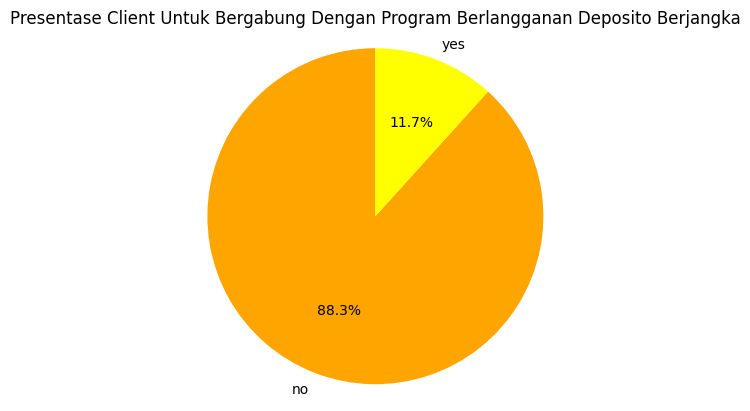

In [14]:
presentase = keputusan_pelanggan['presentase']

labels = []
for i, label in enumerate(keputusan_pelanggan.index):
  labels.append(label)

# Mengganti warna
warna = ['orange','yellow']

# Plot pie chart
plt.pie(presentase, labels=labels, autopct='%1.1f%%', startangle=90, colors=warna)

# Mengatur aspek proporsi pie chart menjadi sama agar terlihat bulat
plt.axis('equal')

# Menambahkan judul
plt.title('Presentase Client Untuk Bergabung Dengan Program Berlangganan Deposito Berjangka')

# Menampilkan pie chart
plt.show()

keterangan:

pada pie chart diatas sebesar 88.3% memilih tidak bergabung dengan program berlangganan deposito sedangkan 11.7% memilih bergabung.

## Menampilkan status pernikahan pelanggan

In [15]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, 'Status pernikahan pelanggan')

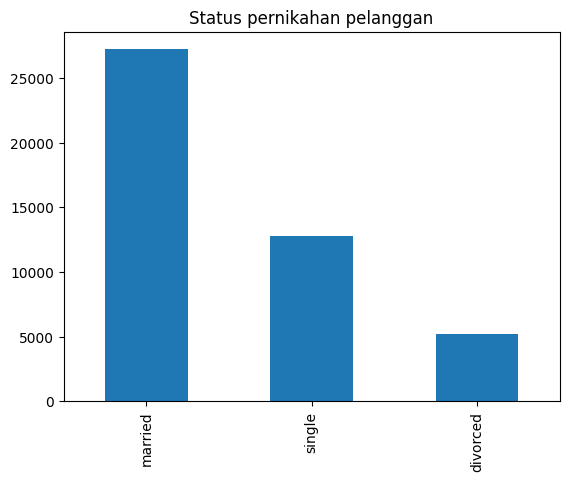

In [16]:
df['marital'].value_counts().plot(kind='bar')
plt.title('Status pernikahan pelanggan')

keterangan:

Jumlah client yang marrried adalah 27214 orang, single 12790 orang, dan divorced 5207 orang.

In [17]:
marital_counts = df['marital'].value_counts()

y_counts = df['y'].value_counts()

marital_percentages = {}
for status in marital_counts.index:
  marital_filter = df['marital'] == status
  y_counts_by_marital = df[marital_filter]['y'].value_counts()

  percentage_yes = (y_counts_by_marital['yes']/y_counts_by_marital.sum())*100
  percentage_no = (y_counts_by_marital['no']/y_counts_by_marital.sum())*100

  marital_percentages[status] = {
      'yes':percentage_yes,
      'no':percentage_no
  }

marital_percentages

{'married': {'yes': 10.123465863158668, 'no': 89.87653413684133},
 'single': {'yes': 14.94917904612979, 'no': 85.05082095387021},
 'divorced': {'yes': 11.945458037257538, 'no': 88.05454196274246}}

In [18]:
df_marital_percentages = pd.DataFrame(marital_percentages)
df_marital_percentages

,married,single,divorced
yes,10.123466,14.949179,11.945458
no,89.876534,85.050821,88.054542


In [19]:
categories = list(marital_percentages.keys())

merged_category = {}
for category in categories:
  merged_category[f'{category} yes'] = df_marital_percentages[category]['yes']
  merged_category[f'{category} no'] = df_marital_percentages[category]['no']

# Konversi kamus ke DataFrame
df_merged_category = pd.DataFrame(merged_category.values(), index=merged_category.keys(), columns=['Percentage'])
df_merged_category

,Percentage
married yes,10.123466
married no,89.876534
single yes,14.949179
single no,85.050821
divorced yes,11.945458
divorced no,88.054542


Visualisasi dengan pie chart

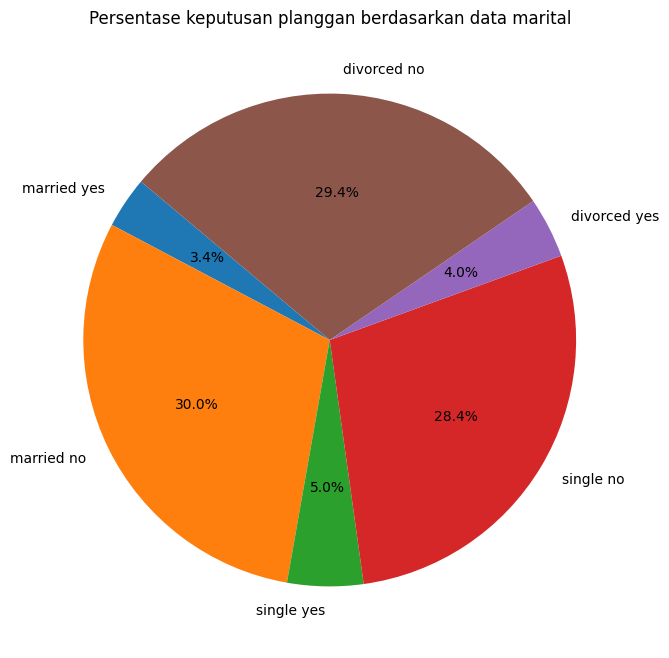

In [20]:
# Plotting pie chart dari DataFrame
plt.figure(figsize=(8, 8))
plt.pie(df_merged_category['Percentage'], labels=df_merged_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase keputusan planggan berdasarkan data marital')
plt.show()

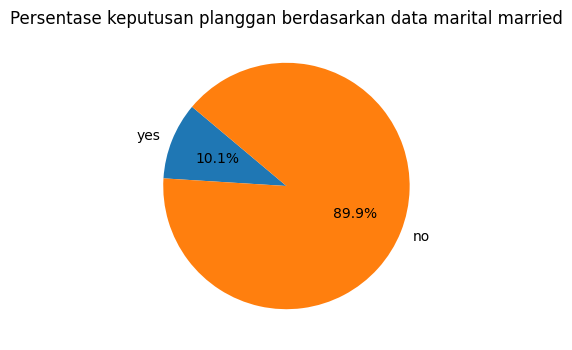

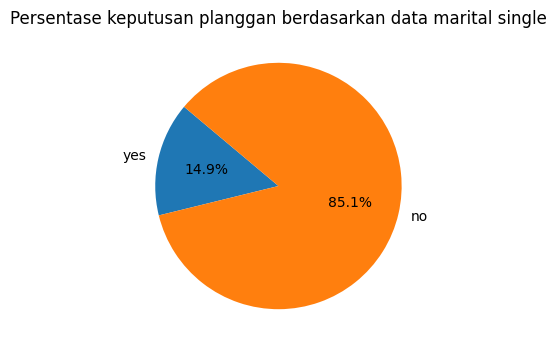

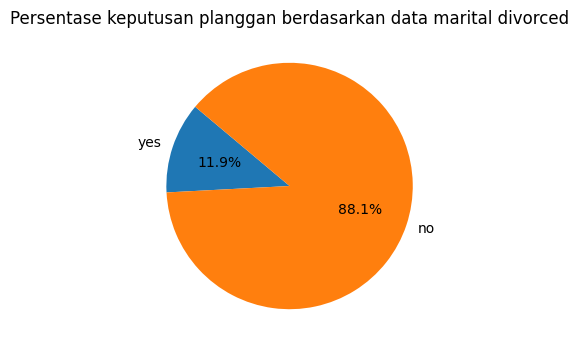

In [21]:
# # Plotting pie chart dari DataFrame
marital_status = list(df_marital_percentages.keys())

for status in marital_status:
  plt.figure(figsize=(4, 4))
  plt.pie(df_marital_percentages[status], labels=df_marital_percentages.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Persentase keputusan planggan berdasarkan data marital {status}')
  plt.show()

Keterangan:

Mayoritas dari semua status marital (married, single, dan divorced) adalah "no," dengan persentase sekitar 85-89%. Ini menunjukkan bahwa sebagian besar orang dalam dataset ini tidak mengambil deposito yang disediakan.

Persentase "yes" untuk semua status marital lebih rendah daripada "no," berkisar antara 10-15%. Ini menunjukkan bahwa jumlah orang yang mengambil deposito yang disediakan jauh lebih rendah dibandingkan yang tidak mengambil.

Status marital "single" memiliki persentase "yes" yang sedikit lebih tinggi dibandingkan dengan "married" dan "divorced." Ini mungkin menunjukkan bahwa orang yang belum menikah ("single") lebih mungkin untuk mengambil deposito yang disediakan.

Meskipun ada perbedaan dalam persentase "yes" di antara status marital, mayoritas individu dalam semua kategori tetap tidak mengambil deposito yang disediakan.

## Menampilkan status pendidikan pelanggan

In [22]:
education_counts = df['education'].value_counts()
education_counts

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Jumlah pelanggan berdasarkan status pendidikan')

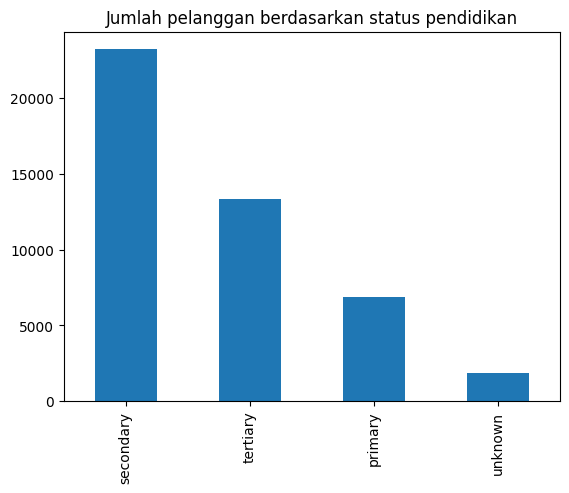

In [23]:
education_counts.plot(kind='bar')
plt.title('Jumlah pelanggan berdasarkan status pendidikan')

keterangan:

Jumlah client yang menempuh pendidikan primary adalah 6851 orang, secondary 23202 orang, tertiary 13301 orang dan unknown 1857 orang.

In [24]:
y_by_education = {}

for education in education_counts.index:
  y_counts_by_education = df[df['education'] == education]['y'].value_counts()

  y_by_education[education] = {
      'yes': y_counts_by_education['yes'],
      'no': y_counts_by_education['no']
  }

y_by_education

{'secondary': {'yes': 2450, 'no': 20752},
 'tertiary': {'yes': 1996, 'no': 11305},
 'primary': {'yes': 591, 'no': 6260},
 'unknown': {'yes': 252, 'no': 1605}}

In [25]:
df_y_by_education = pd.DataFrame(y_by_education)
df_y_by_education

,secondary,tertiary,primary,unknown
yes,2450,1996,591,252
no,20752,11305,6260,1605


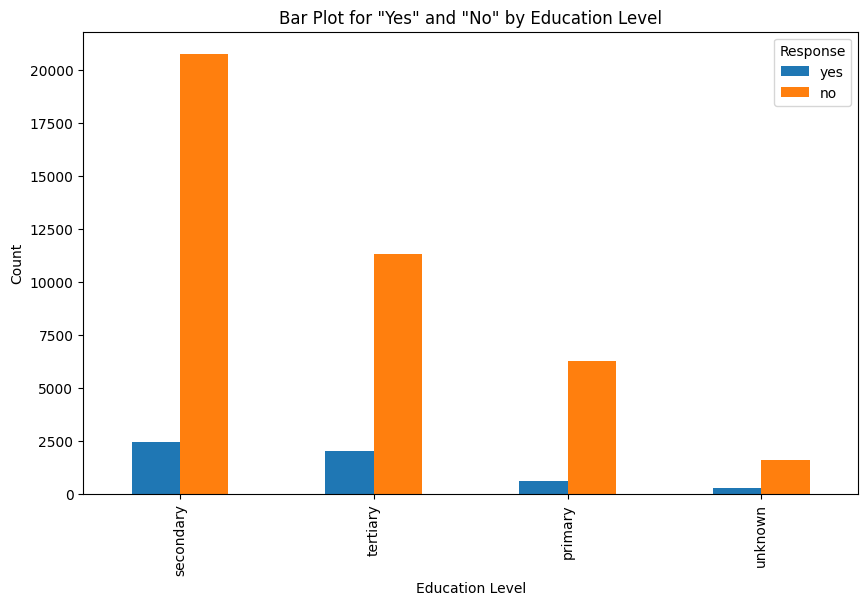

In [26]:
ax = df_y_by_education.T.plot(kind='bar', figsize=(10,6))
plt.title('Bar Plot for "Yes" and "No" by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Response', labels=list(df_y_by_education.index))

plt.show()

keterangan:

Tingkat pendidikan "secondary" memiliki jumlah yang signifikan untuk keduanya "yes" (2450) dan "no" (20752). Namun, mayoritas dari mereka adalah "no."

Tingkat pendidikan "tertiary" juga memiliki jumlah yang signifikan untuk keduanya "yes" (1996) dan "no" (11305), dengan mayoritas lagi-lagi adalah "no."

Tingkat pendidikan "primary" memiliki jumlah yang lebih rendah, baik untuk "yes" (591) maupun "no" (6260).

Kategori "unknown" memiliki jumlah yang paling rendah, dengan hanya 252 "yes" dan 1605 "no."

Mayoritas dari semua tingkat pendidikan (secondary, tertiary, primary, dan unknown) adalah "no," yang mengindikasikan bahwa sebagian besar orang dalam dataset ini tidak mengambil produk (atau deposito) yang ditawarkan.

Namun, ada variasi dalam jumlah "yes" di antara tingkat pendidikan, dengan "tertiary" memiliki jumlah "yes" tertinggi, meskipun mayoritas dari mereka masih "no."

## Menampilkan Histogram

                age        balance      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058    258.163080      2.763841     40.197828   
std       10.618762    3044.765829    257.527812      3.098021    100.128746   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      72.000000    103.000000      1.000000     -1.000000   
50%       39.000000     448.000000    180.000000      2.000000     -1.000000   
75%       48.000000    1428.000000    319.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000  


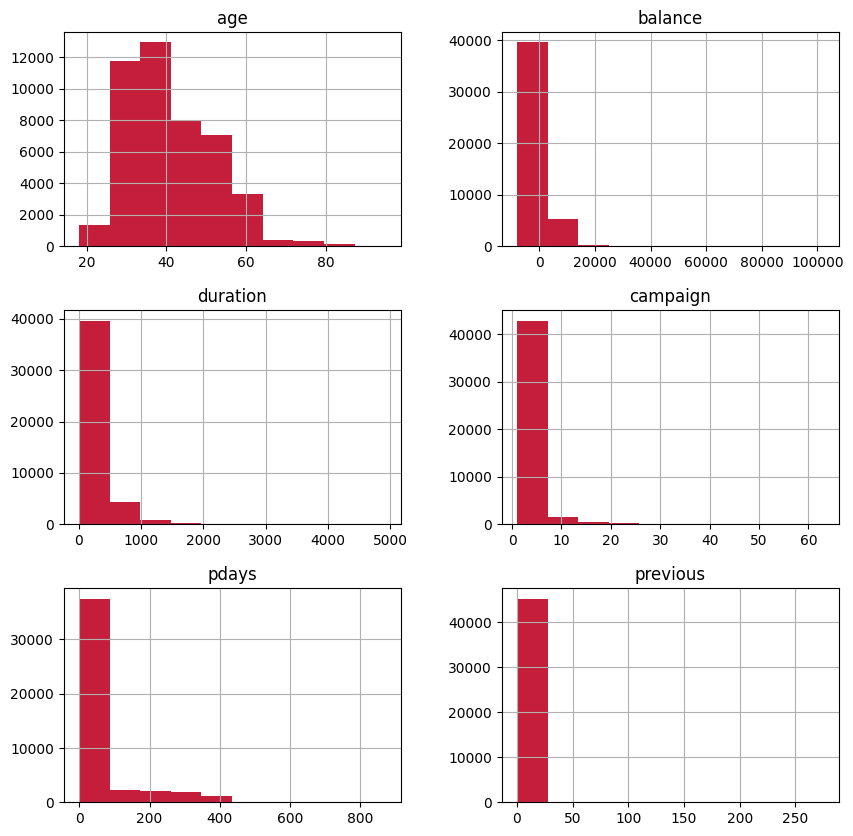

In [27]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Data
# data = [23, 45, 34, 67, 56, 34, 23, 12, 45, 34, 23, 34, 56, 67, 23, 45, 34, 12]

# # Membuat DataFrame
# df = pd.DataFrame(data, columns=['Value'])

# Menampilkan ringkasan statistik
summary = df.describe()

# Menampilkan tabel statistik
print(summary)

# Plotting histogram
# histogram
df.hist(figsize=(10,10), color='#C41E3A')
plt.show()



keterangan:

Jumlah Data: Terdapat 45.211 entri atau pengamatan dalam dataset.

Usia (Age):

Usia rata-rata nasabah adalah sekitar 40.94 tahun.
Usia bervariasi dari 18 hingga 95 tahun.
Quartil pertama (25%) dari usia adalah 33 tahun, sedangkan quartil ketiga (75%) adalah 48 tahun.
Saldo (Balance):

Saldo rata-rata dalam akun nasabah adalah sekitar 1,362.27.
Saldo berkisar antara -8,019 hingga 102,127.
Quartil pertama (25%) dari saldo adalah 72, dan quartil ketiga (75%) adalah 1,428.
Hari dalam Seminggu (Day of Week):

Durasi panggilan rata-rata adalah sekitar 258.16 detik.
Durasi panggilan berkisar dari 0 hingga 4,918 detik.
Quartil pertama (25%) adalah 103 detik, sedangkan quartil ketiga (75%) adalah 319 detik.
Jumlah Kontak dalam Kampanye (Campaign):

Rata-rata jumlah kontak dalam kampanye adalah sekitar 2.76.
Jumlah kampanye berkisar dari 1 hingga 63.
Quartil pertama (25%) adalah 1, quartil ketiga (75%) adalah 3.
Pdays (Jumlah Hari Sejak Kontak Sebelumnya):

Rata-rata jumlah hari sejak kontak sebelumnya adalah sekitar 40.20.
Nilai minimum adalah -1, yang mungkin menandakan bahwa beberapa nasabah belum pernah dihubungi sebelumnya.
Quartil pertama (25%), median (50%), dan quartil ketiga (75%) semuanya adalah -1.
Previous (Jumlah Kontak Sebelum Kampanye Ini):

Rata-rata jumlah kontak sebelum kampanye ini adalah sekitar 0.58.
Jumlah kontak sebelum kampanye berkisar dari 0 hingga 275.
Quartil pertama (25%), median (50%), dan quartil ketiga (75%) semuanya adalah 0.

# Data Preprocessing

## Encoding data kategorikal

In [28]:
# Memisahkan kolom berdasarkan tipe data
kolom_kategorikal = df.select_dtypes(include=['object'])  # Kolom dengan tipe data objek (kategorikal)
kolom_numerikal = df.select_dtypes(exclude=['object'])  # Kolom dengan tipe data bukan objek (numerikal)

In [29]:
label_encoder = LabelEncoder()

df_bank = df.copy()

for kolom in kolom_kategorikal:
  if kolom == 'day_of_week':
    continue

  df_bank[kolom] = label_encoder.fit_transform(df_bank[kolom])
  print(f'Kolom {kolom}\
          \nsebelum: {df[kolom].unique()}\
          \nsesudah: {df_bank[kolom].unique()}\
          \n===============================')


Kolom job          
sebelum: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']          
sesudah: [ 4  9  2  1 11  5  0  7  6 10  3  8]          
Kolom marital          
sebelum: ['married' 'single' 'divorced']          
sesudah: [1 2 0]          
Kolom education          
sebelum: ['tertiary' 'secondary' 'unknown' 'primary']          
sesudah: [2 1 3 0]          
Kolom default          
sebelum: ['no' 'yes']          
sesudah: [0 1]          
Kolom housing          
sebelum: ['yes' 'no']          
sesudah: [1 0]          
Kolom loan          
sebelum: ['no' 'yes']          
sesudah: [0 1]          
Kolom contact          
sebelum: ['unknown' 'cellular' 'telephone']          
sesudah: [2 0 1]          
Kolom month          
sebelum: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']          
sesudah: [ 8  6  5  1 10  9  2  4  3  7  0 11]          
Kolom poutcome  

In [30]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


## Standarisasi kolom numerik

In [31]:
scaler = StandardScaler()
df_scaled = df_bank.copy()

for kolom in kolom_numerikal:
  df_scaled[kolom] = scaler.fit_transform(df_scaled[kolom].values.reshape(-1,1))

df_scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,5,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,5,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,5,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,5,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,5,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


<ipython-input-32-1dc5d3d381a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_scaled.corr(), annot=True, cmap="Greens")


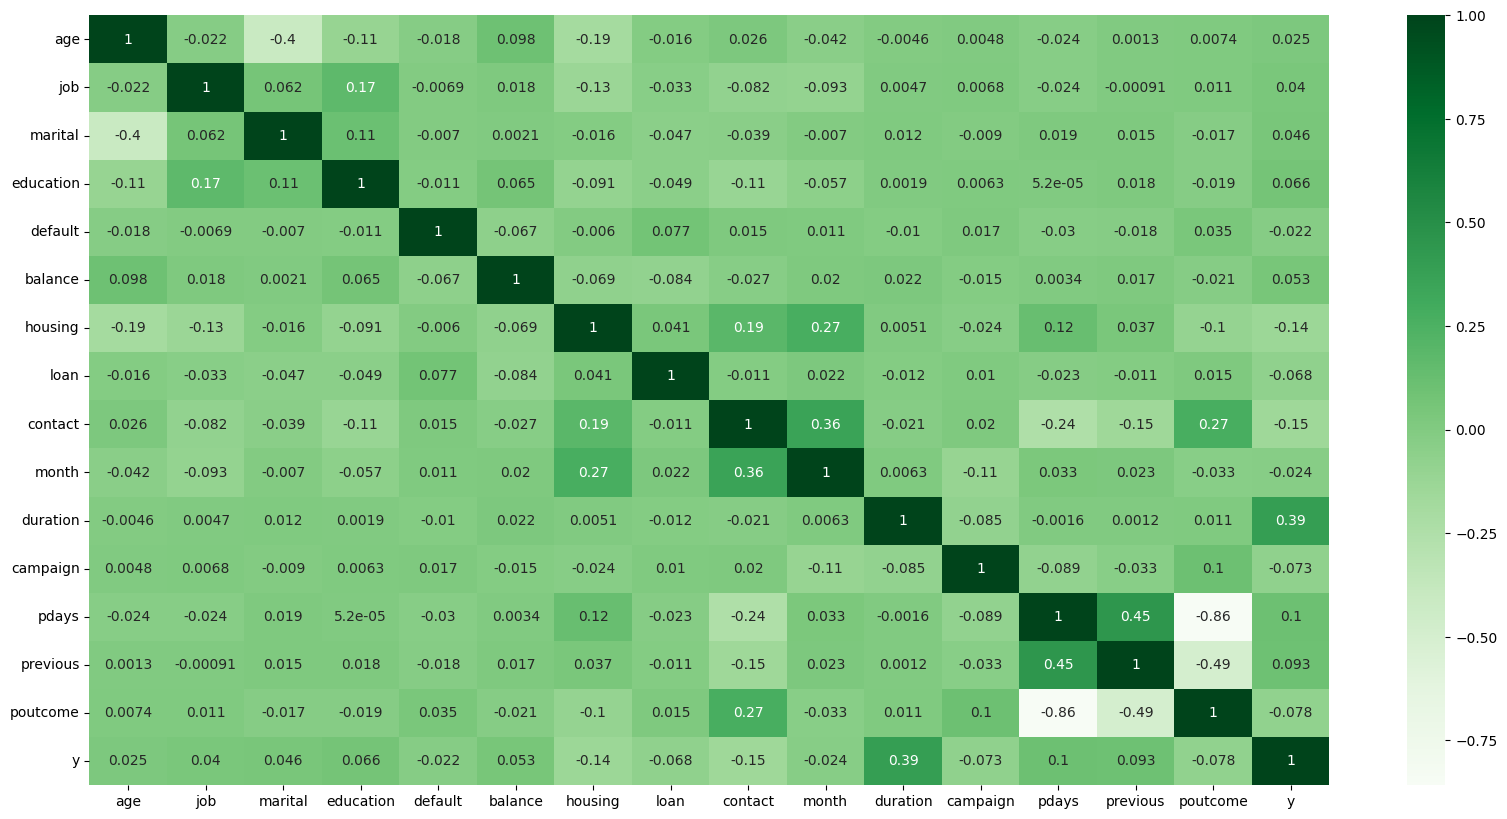

In [32]:
# annot=True digunakan untuk menampilkan nilai korelasi pada setiap kotak pada heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(df_scaled.corr(), annot=True, cmap="Greens")

# Modelling

## Train Test Split

In [33]:
X = df_scaled.drop('y', axis=1)
y = df_scaled['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [34]:
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (31647, 16)
Shape y_train: (31647,)
Shape X_test: (13564, 16)
Shape y_test: (13564,)


## Logistic Regression

In [56]:
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
print(f'Akurasi logistic regression:', acc_lr)


Akurasi logistic regression: 0.8898554998525509


In [57]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11729,   237],
       [ 1257,   341]])

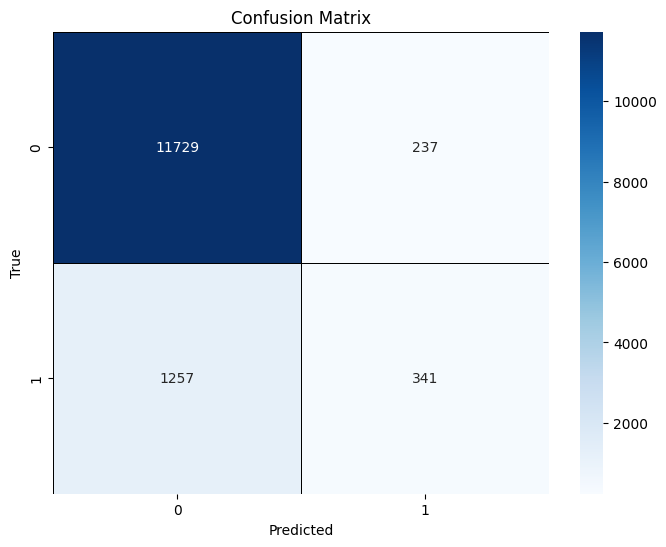

In [58]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [59]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.59      0.21      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



Hasil evaluasi kinerja model Regresi Logistik adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model memiliki precision sebesar 90%, yang mengindikasikan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 98%, yang menunjukkan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score yang tinggi (94%) mencerminkan kinerja yang baik dalam memprediksi kelas 0.

Namun, untuk kelas 1 (kelas minoritas), precision yang rendah (59%) menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah salah. Recall yang juga rendah (21%) menunjukkan bahwa model gagal mengidentifikasi sebagian besar sampel kelas 1. F1-Score yang rendah (31%) mencerminkan kinerja yang lebih rendah dalam memprediksi kelas 1.

## K-Nearest Neighbour

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
print(f'Akurasi KNN:', acc_knn)

Akurasi KNN: 0.8891182542023002


In [40]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11525,   441],
       [ 1063,   535]])

In [41]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.55      0.33      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564



Hasil evaluasi kinerja model K-Nearest Neighbors (KNN) dengan metrik precision, recall, dan F1-score adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model KNN memiliki precision sebesar 92%, yang mengindikasikan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 96%, yang menunjukkan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score yang tinggi (94%) mencerminkan kinerja yang baik dalam memprediksi kelas 0.

Namun, untuk kelas 1 (kelas minoritas), precision yang rendah (55%) menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah salah. Recall yang juga rendah (33%) menunjukkan bahwa model gagal mengidentifikasi sebagian besar sampel kelas 1. F1-Score yang rendah (42%) mencerminkan kinerja yang lebih rendah dalam memprediksi kelas 1.

## Support Vector Machine

In [42]:
# Membuat objek SVM
svm = SVC(kernel='linear')

# Melatih model pada data training
svm.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
svm = svm.predict(X_test)

# Menghitung akurasi prediksi pada data testing
acc_svm = accuracy_score(y_test, svm)
print("Akurasi SVM:", acc_svm)

Akurasi SVM: 0.8821881450899439


In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11525,   441],
       [ 1063,   535]])

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11966
           1       0.55      0.33      0.42      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564



Hasil evaluasi kinerja model Support Vector Machine (SVM) dengan metrik precision, recall, dan F1-score adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model SVM memiliki precision sebesar 92%, menunjukkan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 96%, yang mengindikasikan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score yang tinggi (94%) mencerminkan kinerja yang baik dalam memprediksi kelas 0.

Namun, untuk kelas 1 (kelas minoritas), precision yang rendah (55%) menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah salah. Recall yang juga rendah (33%) menunjukkan bahwa model gagal mengidentifikasi sebagian besar sampel kelas 1. F1-Score yang rendah (42%) mencerminkan kinerja yang lebih rendah dalam memprediksi kelas 1.

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Membuat objek Decision Tree
dtc = DecisionTreeClassifier()

# Melatih model pada data training
dtc.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
y_pred = dtc.predict(X_test)

# Menghitung akurasi prediksi pada data testing
acc_dtc = accuracy_score(y_test, y_pred)
print("Akurasi Decision Tree:", acc_dtc)

Akurasi Decision Tree: 0.8740047183721616


In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11111,   855],
       [  854,   744]])

In [47]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



Hasil evaluasi kinerja model Decision Tree dengan metrik precision, recall, dan F1-score adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model Decision Tree memiliki precision sebesar 93%, yang mengindikasikan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 93%, menunjukkan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score yang tinggi (93%) mencerminkan kinerja yang baik dalam memprediksi kelas 0.

Namun, untuk kelas 1 (kelas minoritas), precision yang rendah (47%) menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah salah. Recall yang juga rendah (47%) menunjukkan bahwa model gagal mengidentifikasi sebagian besar sampel kelas 1. F1-Score yang rendah (47%) mencerminkan kinerja yang lebih rendah dalam memprediksi kelas 1.

## Random Forest

In [48]:
# Membuat objek DRandom Forest dengan n_estimators=100
rf = RandomForestClassifier(n_estimators=100)

# Melatih model pada data training
rf.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
y_pred = rf.predict(X_test)

# Menghitung akurasi prediksi pada data testing
acc_rf = accuracy_score(y_test, y_pred)
print("Akurasi Random Forest:", acc_rf)

Akurasi Random Forest: 0.9024624004718372


In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11566,   400],
       [  923,   675]])

In [50]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.63      0.42      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.73     13564
weighted avg       0.89      0.90      0.89     13564



Hasil evaluasi kinerja model Random Forest dengan metrik precision, recall, dan F1-score adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model Random Forest memiliki precision sebesar 93%, yang mengindikasikan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 97%, menunjukkan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score yang tinggi (95%) mencerminkan kinerja yang sangat baik dalam memprediksi kelas 0.

Sementara itu, untuk kelas 1 (kelas minoritas), precision sebesar 63% menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah benar. Recall sebesar 42% menunjukkan bahwa model berhasil mengidentifikasi sebagian sampel kelas 1, meskipun recall ini lebih rendah. F1-Score sebesar 51% mencerminkan kinerja yang sedang dalam memprediksi kelas 1.

## Naive Bayes

In [51]:
# Membuat objek naive bayes
nb = GaussianNB()

# Melatih model pada data training
nb.fit(X_train, y_train)

# Memprediksi kelas target pada data testing
y_pred = nb.predict(X_test)

# Menghitung akurasi prediksi pada data testing
acc_nb = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", acc_nb)

Akurasi Naive Bayes: 0.827779416101445


In [52]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10474,  1492],
       [  844,   754]])

In [53]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.88      0.90     11966
           1       0.34      0.47      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.65     13564
weighted avg       0.86      0.83      0.84     13564



Hasil evaluasi kinerja model Naive Bayes dengan metrik precision, recall, dan F1-score adalah sebagai berikut:

Untuk kelas 0 (kelas mayoritas), model Naive Bayes memiliki precision sebesar 93%, yang mengindikasikan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 0 adalah benar. Recall sebesar 88%, menunjukkan bahwa model berhasil mengidentifikasi sebagian besar sampel kelas 0. F1-Score sebesar 90% mencerminkan kinerja yang baik dalam memprediksi kelas 0.

Namun, untuk kelas 1 (kelas minoritas), precision yang rendah (34%) menandakan bahwa sebagian besar prediksi yang diklasifikasikan sebagai kelas 1 adalah salah. Recall yang lebih tinggi (47%) menunjukkan bahwa model berhasil mengidentifikasi sebagian sampel kelas 1, meskipun recall ini masih di bawah optimal. F1-Score yang rendah (39%) mencerminkan kinerja yang lebih rendah dalam memprediksi kelas 1.

# Komparasi Akurasi

In [60]:
print('Hasil beberapa akurasi dari model machine learning:')
print('Akurasi Logistic Regression:', acc_lr)
print('Akurasi K-Nearest Neighbors:', acc_knn)
print('Akurasi Support Vector Machine:', acc_svm)
print('Akurasi Decision Tree:', acc_dtc)
print('Akurasi Random Forest:', acc_rf)
print('Akurasi Naive Bayes:', acc_nb)

Hasil beberapa akurasi dari model machine learning:
Akurasi Logistic Regression: 0.8898554998525509
Akurasi K-Nearest Neighbors: 0.8891182542023002
Akurasi Support Vector Machine: 0.8821881450899439
Akurasi Decision Tree: 0.8740047183721616
Akurasi Random Forest: 0.9024624004718372
Akurasi Naive Bayes: 0.827779416101445


Dari hasil beberapa akurasi model machine learning yang telah dievaluasi, kita dapat menyimpulkan bahwa model Random Forest memiliki kinerja akurasi tertinggi dengan akurasi sekitar 90.25%, diikuti oleh model Logistic Regression dengan akurasi sekitar 88.99%.

Meskipun model K-Nearest Neighbors dan Support Vector Machine memiliki akurasi yang cukup tinggi (sekitar 88.91% dan 88.22% secara berturut-turut), mereka masih sedikit di bawah akurasi model Logistic Regression.

Sementara itu, model Decision Tree memiliki akurasi sekitar 87.40%, dan model Naive Bayes memiliki akurasi terendah, yaitu sekitar 82.78%.